<a href="https://colab.research.google.com/github/Ashishcseai/1.-Predict-Student-Dropout-/blob/main/Ashish_Maurya(202401100300074).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving student_dropout.csv.csv to student_dropout.csv (4).csv
Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

 Not At Risk       0.62      0.53      0.57        19
     At Risk       0.36      0.45      0.40        11

    accuracy                           0.50        30
   macro avg       0.49      0.49      0.49        30
weighted avg       0.53      0.50      0.51        30



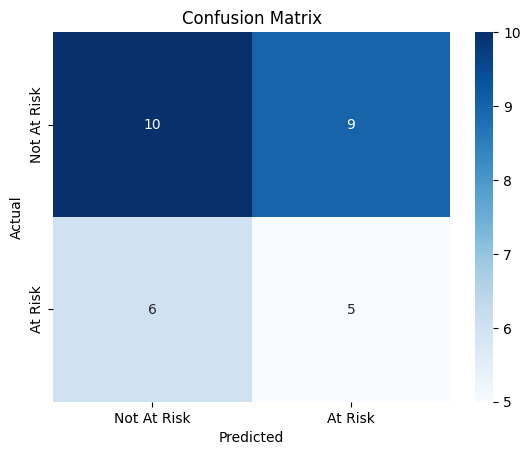

Prediction for new student: At Risk


In [ ]:
# Upload CSV in Colab
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the uploaded file
df = pd.read_csv("student_dropout.csv")

# Step 2: Encode labels
label_encoder = LabelEncoder()
df['dropout_risk'] = label_encoder.fit_transform(df['dropout_risk'])  # yes = 1, no = 0

# Step 3: Split features and target
X = df[['attendance', 'grades', 'participation']]
y = df['dropout_risk']

# Step 4: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 6: Train model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Not At Risk', 'At Risk']))

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not At Risk', 'At Risk'], yticklabels=['Not At Risk', 'At Risk'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 9: New prediction
new_student = pd.DataFrame({'attendance': [75], 'grades': [7.0], 'participation': [5]})
new_scaled = scaler.transform(new_student)
result = model.predict(new_scaled)[0]
print("Prediction for new student:", "At Risk" if result == 1 else "Not At Risk")
